# **Fetal Health Classification**
---
### Dejvid Isufaj 3210056
Project for Machine Learning course in AUEB 2024-2025


In this project we were asked to perform a multiclass classification in a dataset of our choice, by implementating various machine learning algorithms.
Specifically the algorithms we were asked to create were :


*   PCA
*   Least Squares
*   Logistic Regression
*   K Nearest Neighbors
*   Naïve Bayes
*   A Multilayer Perceptron using Pytorch framework
*   SVM
*   K-Means

all developed from scratch without relying on high-level libraries such as scikit-learn.





## **Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from collections import Counter

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler


import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load Data**

### **Description**

For this task we are using the **Fetal Health Dataset**, sourced from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification).


> The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.\
Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.\
In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

This dataset contains comprehensive information collected from fetal heart rate monitoring, and we are going to create machine learning algorithms that classify the fetal health status based on these information.

#### **Dataset Overview**


- **Number of Instances (Samples):** 2,913
- **Number of Features:** 21
- **Target Variable (Label):** `fetal_health`
  - **Classes:**
    - **1:** Normal
    - **2:** Suspect
    - **3:** Pathological
- **Features :**
  - **'baseline_value'**: FHR baseline (beats per minute)
  - **'accelerations'**: Number of accelerations per second
  - **'fetal_movement'**: Number of fetal movements per second
  - **'uterine_contractions'**: Number of uterine contractions per second
  - **'light_decelerations'**: Number of light decelerations per second
  - **'severe_decelerations'**: Number of severe decelerations per second
  - **'prolonged_decelerations'**: Number of prolonged decelerations per second
  - **'abnormal_short_term_variability'**: Percentage of time with abnormal short-term variability
  - **'mean_value_of_short_term_variability'**: Mean value of short-term variability
  - **'percentage_of_time_with_abnormal_long_term_variability'**: Percentage of time with abnormal long-term variability
  - **'mean_value_of_long_term_variability'**: Mean value of long-term variability
  - **'histogram_width'**: Width of FHR histogram
  - **'histogram_min'**: Minimum (low frequency) of FHR histogram
  - **'histogram_max'**: Maximum (high frequency) of FHR histogram
  - **'histogram_number_of_peaks'**: Number of histogram peaks
  - **'histogram_number_of_zeroes'**: Number of histogram zeros
  - **'histogram_mode'**: Histogram mode
  - **'histogram_mean'**: Histogram mean
  - **'histogram_median'**: Histogram median
  - **'histogram_variance'**: Histogram variance
  - **'histogram_tendency'**: Histogram tendency




### **Loading the data**

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Resources/fetal_health.csv')

data.head(5)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### **Exploring the data**
 Before we proceed with our tasks, we must first get to know our data

 #### **Check for missing values**

In [ ]:
missing_values = data.isnull().sum()
print("Missing Values in Each Feature:\n", missing_values)

Missing Values in Each Feature:
 baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogr

 #### **Calculate the variance of the features**

In [ ]:
# Calculate variance for each feature
feature_variances = data.var()
feature_variances = pd.DataFrame(feature_variances)
feature_variances.columns = ['Variances']
feature_variances


,Variances
baseline value,9.684222e+01
accelerations,1.494279e-05
fetal_movement,2.177701e-03
uterine_contractions,8.679323e-06
light_decelerations,8.762835e-06
severe_decelerations,3.283272e-09
prolongued_decelerations,3.480381e-07
abnormal_short_term_variability,2.955928e+02
mean_value_of_short_term_variability,7.801153e-01
percentage_of_time_with_abnormal_long_term_variability,3.384452e+02


As we see there are some features with very low variance (accelerations, uterine_contractions, light_decelerations, severe_decelerations, prolongued_deceleration). These features don't have significant contribution in helping to differentiate between classes. We could drop these features, but we are keeping them t least for now.

####**Distribution of each feature**

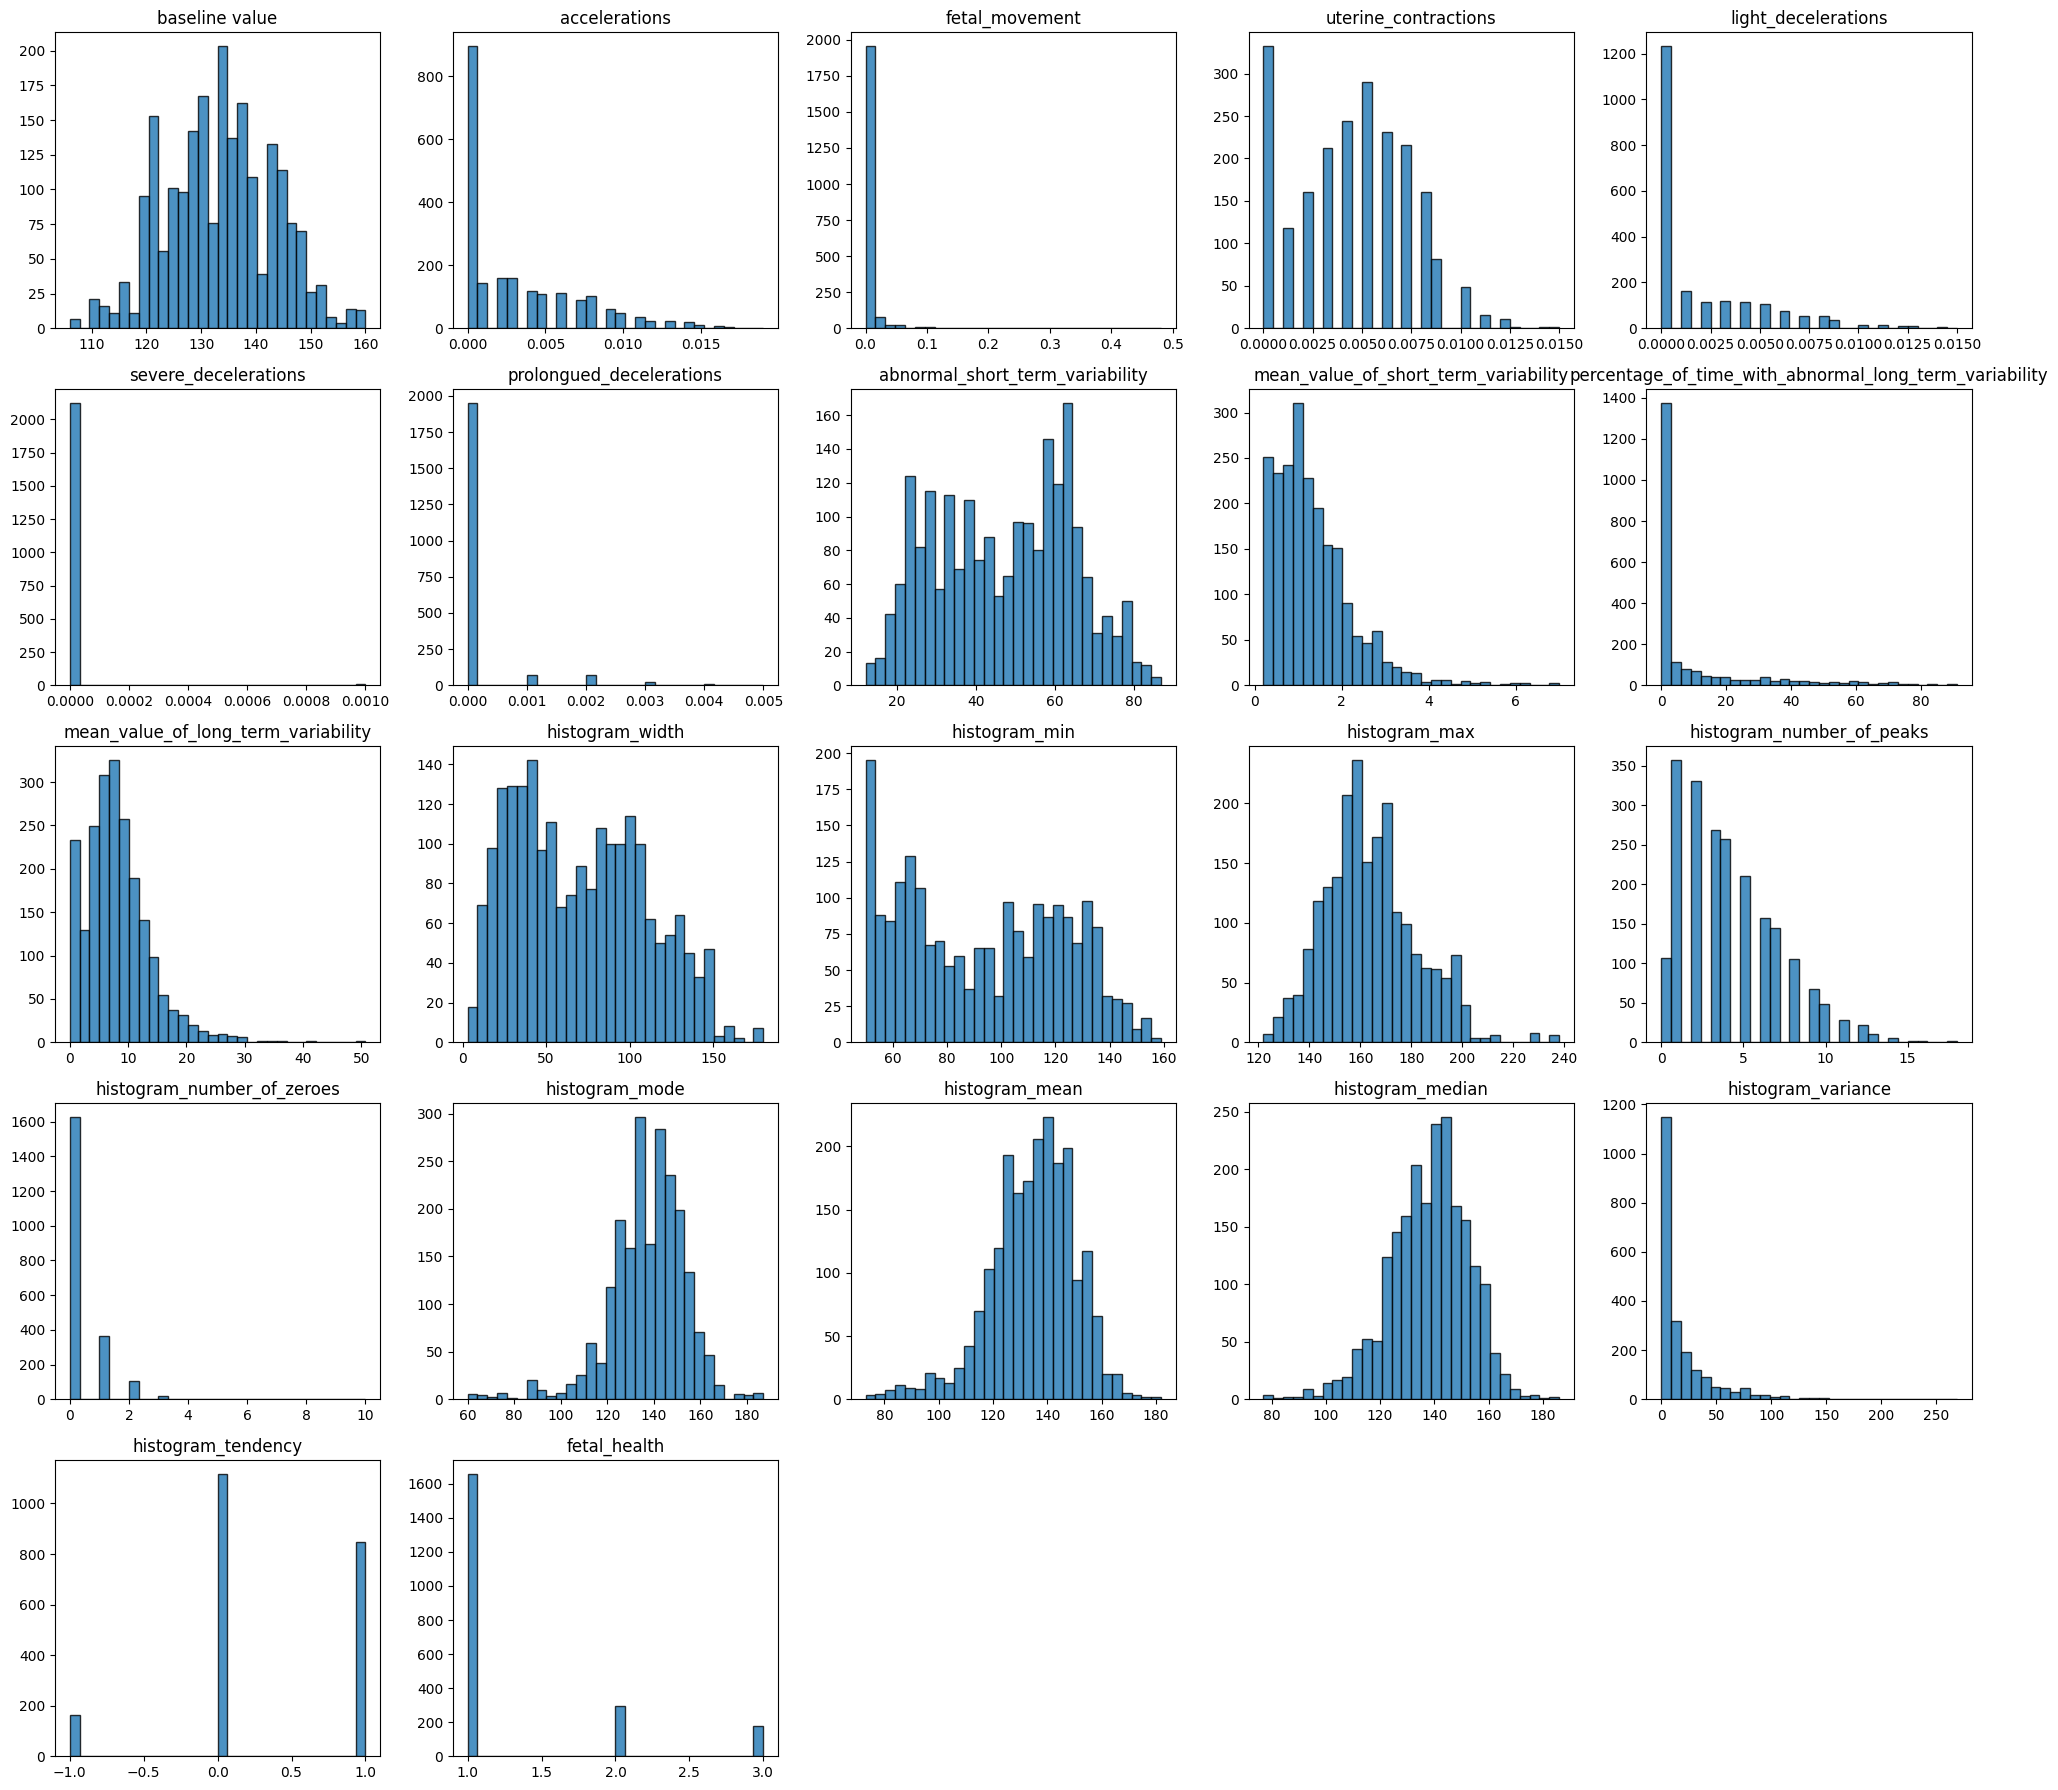

In [ ]:
_ = data.hist(figsize=(20, 18), bins=30, alpha=0.8, grid=False, edgecolor="black")
plt.tight_layout()

####**Imbalance of the data**

<Axes: xlabel='fetal_health', ylabel='count'>

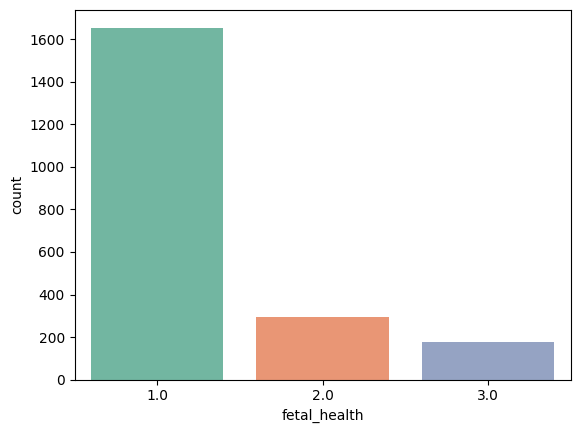

In [ ]:
sns.countplot(data= data, x="fetal_health",hue="fetal_health",palette="Set2",legend=False)

#### Calculating the Correlation Matrix

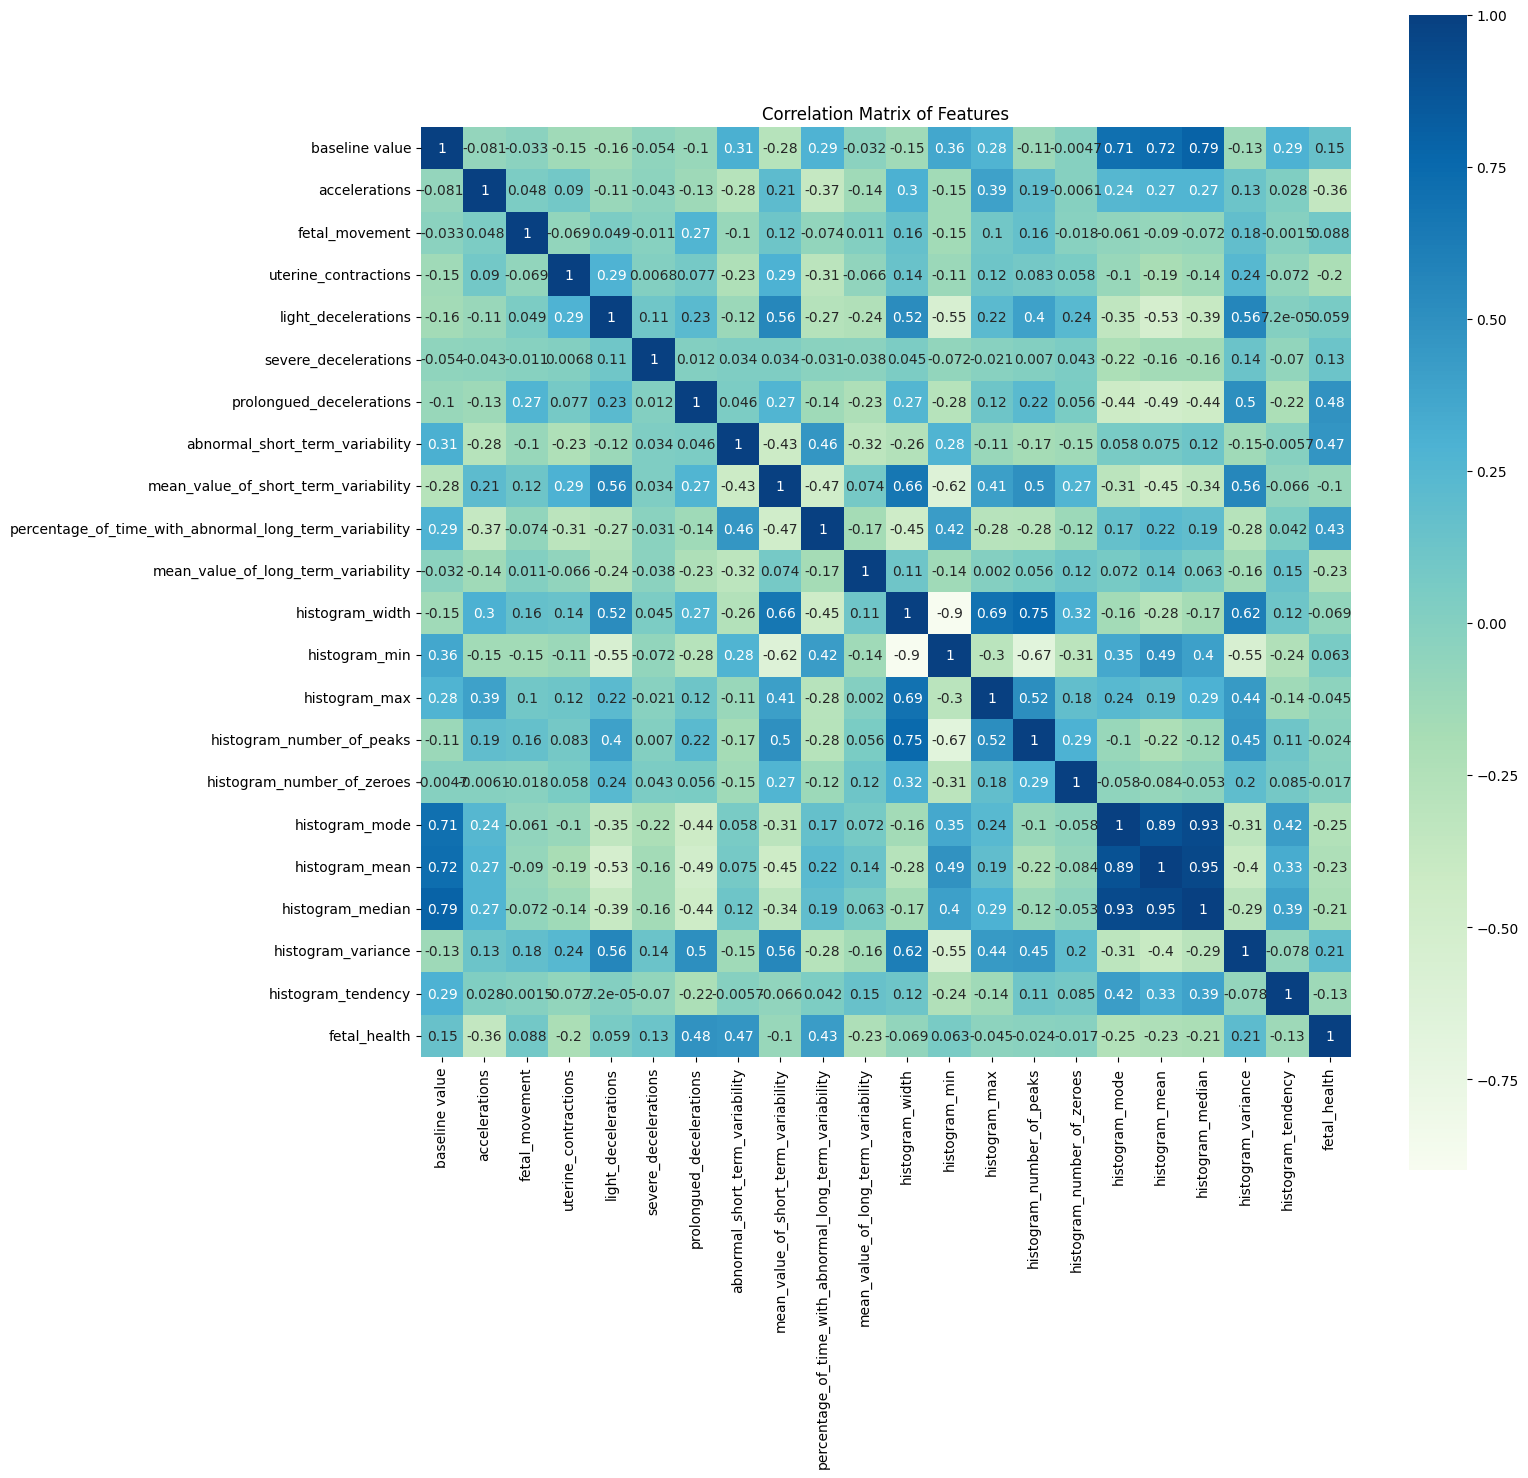

In [ ]:

corr_matrix = data.corr()


plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu',square=True)
plt.title('Correlation Matrix of Features')
plt.show()


## **Split data in training and test sets ( x contains features, y contains target).**

In [ ]:
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(np.array(X_train))
X_test = scaler.fit_transform(np.array(X_test))

y_train = np.array(y_train)
y_test = np.array(y_test)


## **Principal Component Analysis (PCA)**

### **Standard PCA - Analysis of Covariance Matrix**

We will follow these steps :


1. Calculate the mean vector $\mu$ of the data
2. Normalize the data to have a zero mean:
$$\mathbf{X}_n = \mathbf{X}_n - \mu, \quad n = 1,\ldots,N$$
3. Construct the $d \times d$ covariance matrix:
$$\mathbf{S} = \frac{1}{N}\sum_{n=1}^{N} x_n x^T$$
where each $x_n$ is a column vector
    * $\mathbf{S}_{ii}$ (diagonal) is the variance of variable $i$
    * $\mathbf{S}_{ij}$ (off diagonal) is the covariance between variables $i$ and $j$
4. Compute the eigenvalues and eigenvectors of the covariance matrix $\mathbf{S}$
5. Keep the $m$ eigenvectors $\mathbf{U}_{:m}$ corresponding to the $m$ largest eigenvalues (principal components)
6. Project the inputs into the space spanned by the principal components: $\mathbf{X}_{reduced} = \mathbf{X}_{c} \mathbf{U}_{:m}$



In [ ]:
def eigsort(A):
    eigvals, U = np.linalg.eig(A)
    # sort eigenvalues in descending order
    order = np.argsort(eigvals)[::-1]
    eigvals = eigvals[order]
    #re-arrange the eigenvectors
    U = U[:,order]
    return U, eigvals

In [ ]:
def custom_pca(X, M):

    # For each column of the X, calculate the mean, and store it in a row vector
    mu = X.mean(axis=0).reshape( (1,-1) )

    # Normalize data by subtracting the mean from the X
    normalized_X = (X-mu)

    # Construct the Covariance Matrix
    S = (1/X.shape[0]) * normalized_X.T.dot( normalized_X)

    # Calculate the eigenvectors and eigenvalues of the covariance matrix
    eigvectors, eigvals = eigsort( S )

    # Select the first M eigenvectors and eigenvalues
    U = eigvectors[:,:M]
    Lambdas = eigvals[:M]
    print( X.shape, U.shape, Lambdas.shape )

    # Calculate Z = U * X
    Z = normalized_X.dot(U)
    return Z, U, Lambdas, mu

In [ ]:
def number_of_components(eigvals, threshold):
    """
    Determine the number of principal components required to capture a specified proportion of total variance.

    Parameters:
    - eigvals: The sorted eigenvalues of the covariance matrix in descending order.
    - threshold: The desired cumulative proportion of variance to capture.

    Returns:
    - int: The number of principal components needed to meet the cumulative variance proportion threshold.
    """

    eigvals = eigvals.astype('float')
    sum_all = np.sum(eigvals)
    suma = 0
    for i in range(len(eigvals)):
        suma += eigvals[i]
        if suma >= threshold * sum_all:
          print( 'Criterion is valid when we use ', i+1, 'eigenvectors' )
          return i

### **Execution**

#### How many Principal components?

A simple way to select the number of the components in which we will represent our data is to set a threshold for  proportion of the variance that explains our reconstructed data will hold.
In typical scenarios the chosen components should explain at least 85% of the variance

 $$ \frac{\sum_{i=1}^M \lambda_{i}} {\sum_{i=1}^N \lambda_{i}} \geq 0.85$$
85% of the variance is retained.

This logic is impleented in number_of_components

**First of all we are going to execute PCA with all of our features, in order to find the ideal m features.**

In [ ]:
X_df = np.concatenate((X_train, X_test))
y_df = np.concatenate((y_train, y_test))

m = X_df.shape[1]
projection, eigvecs, eigvals, mu = custom_pca(X_df, m)

m_new = number_of_components(eigvals, 0.85) + 1

(2126, 21) (21, 21) (21,)
Criterion is valid when we use  10 eigenvectors


**So as we see we should execute PCA with 10 principal components.**

In [ ]:
def plot_explained_variance(eigenvalues, threshold=85):
    x = range(1, len(eigenvalues) + 1)
    y = [np.sum(eigenvalues[:m].astype('float')) / np.sum(eigenvalues.astype('float')) * 100 for m in x]

    plt.plot(x, y, marker='.')
    plt.plot(x,[85]*len(x), 'r--')
    plt.ylabel("Proportion of Variance (%)")
    plt.xlabel("# of components")
    plt.show()


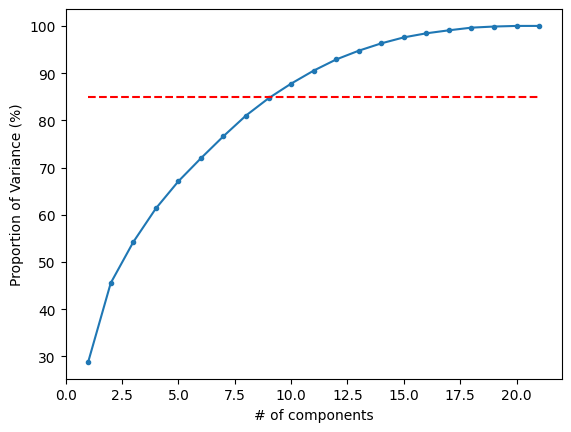

In [ ]:
plot_explained_variance(eigvals)

In [ ]:
def print_explained_variance(eigvals):
        eigvals_df = pd.DataFrame(eigvals)
        eigvals_df.columns = ['Explained Variance']
        eigvals_df.index = [f'Component {i+1}' for i in range(len(eigvals_df))]
        display(eigvals_df)

def print_eigenvectors(eigvecs):
        print("Eigenvectors")
        eigvecs_df = pd.DataFrame(eigvecs)
        eigvecs_df.columns = [f'Component {i+1}' for i in range(eigvecs_df.shape[1])]
        features_names = list(X.columns)
        eigvecs_df.index = features_names
        display(eigvecs_df)

#### **Lets now call our PCA function, with 10 components and then print the eigenvalues and eigenvectors.**

In [ ]:
projection, eigvecs, eigvals, mu = custom_pca(X_df, m_new)
print_explained_variance(eigvals)
print("")
print_eigenvectors(eigvecs)

(2126, 21) (21, 10) (10,)


,Explained Variance
Component 1,6.058131
Component 2,3.508608
Component 3,1.823230
Component 4,1.491797
Component 5,1.209121
Component 6,1.024745
Component 7,0.980335
Component 8,0.919511
Component 9,0.767986
Component 10,0.649585



Eigenvectors


,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10
baseline value,0.224074,-0.277653,0.339231,-0.063019,-0.089283,0.032942,0.240905,0.191626,-0.095086,0.083422
accelerations,-0.043644,-0.279092,-0.182534,0.436978,0.113628,-0.119833,-0.427680,-0.127302,0.254526,0.147788
fetal_movement,-0.078804,-0.041824,0.100562,-0.000223,0.629873,0.179570,0.009649,0.507282,0.252383,-0.377526
uterine_contractions,-0.127362,-0.027276,-0.115049,0.300884,-0.470416,0.350057,0.200568,0.281476,-0.088456,0.009770
light_decelerations,-0.278969,-0.019687,0.202068,-0.078674,-0.351243,0.175843,-0.056009,0.087521,-0.008454,-0.381608
severe_decelerations,-0.057353,0.079009,0.071956,-0.037499,-0.203983,-0.705463,-0.206508,0.596525,-0.051182,0.063242
prolongued_decelerations,-0.202137,0.113267,0.336422,0.092126,0.271707,0.169799,0.217303,0.100192,0.016777,0.616355
abnormal_short_term_variability,0.145441,0.122594,0.491565,-0.096582,-0.045740,-0.093288,-0.136242,-0.212358,-0.155022,0.097131
mean_value_of_short_term_variability,-0.316316,-0.134820,-0.074101,0.044262,-0.070498,0.053210,0.100460,0.018417,-0.030861,-0.170296
percentage_of_time_with_abnormal_long_term_variability,0.217238,0.140932,0.318554,-0.214133,0.007907,-0.028225,0.013446,-0.134665,0.071996,-0.339865


#### **Now we are going to use the Scikit-Learn PCA to compare our results.**

In [ ]:
pca = PCA(n_components=m_new)
projection2 = pca.fit_transform(X_df)

# Access the principal components (eigenvectors) and explained variances
components = pca.components_
explained_variance = pca.explained_variance_

In [ ]:
print_explained_variance(explained_variance)
print("")
print_eigenvectors(components.T)

,Explained Variance
Component 1,6.060982
Component 2,3.510259
Component 3,1.824088
Component 4,1.492499
Component 5,1.209690
Component 6,1.025227
Component 7,0.980796
Component 8,0.919944
Component 9,0.768347
Component 10,0.649891



Eigenvectors


,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10
baseline value,0.224074,0.277653,0.339231,0.063019,-0.089283,-0.032942,-0.240905,0.191626,-0.095086,0.083422
accelerations,-0.043644,0.279092,-0.182534,-0.436978,0.113628,0.119833,0.427680,-0.127302,0.254526,0.147788
fetal_movement,-0.078804,0.041824,0.100562,0.000223,0.629873,-0.179570,-0.009649,0.507282,0.252383,-0.377526
uterine_contractions,-0.127362,0.027276,-0.115049,-0.300884,-0.470416,-0.350057,-0.200568,0.281476,-0.088456,0.009770
light_decelerations,-0.278969,0.019687,0.202068,0.078674,-0.351243,-0.175843,0.056009,0.087521,-0.008454,-0.381608
severe_decelerations,-0.057353,-0.079009,0.071956,0.037499,-0.203983,0.705463,0.206508,0.596525,-0.051182,0.063242
prolongued_decelerations,-0.202137,-0.113267,0.336422,-0.092126,0.271707,-0.169799,-0.217303,0.100192,0.016777,0.616355
abnormal_short_term_variability,0.145441,-0.122594,0.491565,0.096582,-0.045740,0.093288,0.136242,-0.212358,-0.155022,0.097131
mean_value_of_short_term_variability,-0.316316,0.134820,-0.074101,-0.044262,-0.070498,-0.053210,-0.100460,0.018417,-0.030861,-0.170296
percentage_of_time_with_abnormal_long_term_variability,0.217238,-0.140932,0.318554,0.214133,0.007907,0.028225,-0.013446,-0.134665,0.071996,-0.339865


## **Least Squares Classification**

The objective of linear regression is to minimize the cost function, where:

m: is the number of training examples

$\theta$: are our parameteres we want to fit in the model, in this case the weights

$x^{(i)}$: is the i-training example

$x^{(i)}_{j}$: is the i-training example and j-th feature

$y^{(i)}$: is desired output

$$
J(θ) = \frac{1}{2 m} \sum_{i=1}^{m} ( h_{\theta}( x^{(i)} ) - y^{(i)} )^{2}
$$

and the hypothesis $h_{\theta}$

$$h_{\theta}(x) = \theta^{T}x = \theta_{0}x0 + \theta_{1}x1$$

Let's find a closed form for theta.

( So $\frac{1}{2m}$ is omitted in the derivation, as it doesn’t affect the minimization. )

$$
J(θ) = \frac{1}{2 m} ( X \theta - y )^{T} (X \theta - y)
$$

$$
J(θ) = ( X \theta - y )^{T} (X \theta - y)
$$

$$
J(θ) = ( (X \theta)^{T} - y^{T} ) (X \theta - y)
$$

$$
J(θ) = (X \theta)^{T} X \theta - (X \theta)^{T}y - y^{T} (X \theta) + y^{T}y
$$

( recall that that the order of the factors reverses $(AB)^{T} = B^T A^{T}$ )

$$
J(θ) = \theta^{T}X^{T} X \theta - (X \theta)^{T}y - (X \theta)^{T}y + y^{T}y
$$

$$
J(θ) = \theta^{T}X^{T} X \theta - 2 (X \theta)^{T}y + y^{T}y
$$


In order to find the minimum we will derive by $\theta$ and compare to 0

For the derivative we also need 3 rules to keep in mind:


- Rule1: $\nabla_{x}( x^{T} A^{T} A x ) = 2 A^T A x$
- Rule2: $\nabla_{x} ( x^{T} A^{T} b ) = A^{T} b$
- Rule3: $\nabla_{x} ( b^{T} A x ) = A^{T} b$


$$
\nabla_{\theta} J =  2 X^{T} X \theta - 2  X^{T} y
$$


$$
\nabla_{\theta} J =  0
$$

$$
2 X^{T} X \theta - 2  X^{T} y = 0
$$

$$
2 X^{T} X \theta = 2  X^{T} y
$$

$$
X^{T} X \theta = X^{T} y
$$

finally multiply $( X^{T} X )^{-1}$

$$
\theta = ( X^{T} X )^{-1} X^{T} y
$$


Once we have θ we can make predictions on new data X_test. We cdo this by calculating $$\hat{Y} \;=\; \,\bigl( X_{\text{test}} \, \theta  \bigr).$$

In [ ]:
class LeastSquares:
  def __init__(self, num_classes):
        self.theta = None
        self.num_classes = num_classes

  def one_hot_encoding(self,y):
    N = y.shape[0]
    one_hot = np.zeros((N, self.num_classes))

    for i in range(N):
      one_hot[i, y[i] - 1] = 1.0
    return one_hot

  def fit(self, X, Y):
    Y = Y.astype(int)
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    Y_one_hot = self.one_hot_encoding(Y)
    self.theta = np.linalg.solve( X.T.dot(X), X.T.dot(Y_one_hot) )

  def predict(self, X):
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    Y = X.dot(self.theta)
    classes = np.argmax(Y, axis=1) + 1

    return classes

In [ ]:
print(y_train.shape)

(1488,)


### **Lets now train and test our model**

Firstly we are going to find the accuracy, the precision, the recall and the f1-score on our training set.


In [ ]:
least_squares = LeastSquares(3)
least_squares.fit(X_train, y_train)

p_train = least_squares.predict(X_train)
print(classification_report(y_train, p_train))

              precision    recall  f1-score   support

         1.0       0.89      0.98      0.94      1159
         2.0       0.59      0.35      0.44       194
         3.0       0.85      0.65      0.74       135

    accuracy                           0.87      1488
   macro avg       0.78      0.66      0.70      1488
weighted avg       0.85      0.87      0.85      1488



Now that our model is trained, we are going to make predictions on our testing set.

In [ ]:
p_test = least_squares.predict(X_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

         1.0       0.88      0.99      0.93       496
         2.0       0.73      0.36      0.48       101
         3.0       0.78      0.61      0.68        41

    accuracy                           0.86       638
   macro avg       0.80      0.65      0.70       638
weighted avg       0.85      0.86      0.84       638



#### **Comparison with Sklearn's Linear Regression**

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_sklearn = linear_reg.predict(X_train)
y_sklearn = np.rint(y_sklearn).astype(int)
y_sklearn = np.clip(y_sklearn, 1, 3)
print(classification_report(y_train, y_sklearn))

              precision    recall  f1-score   support

         1.0       0.93      0.91      0.92      1159
         2.0       0.40      0.63      0.49       194
         3.0       0.96      0.33      0.49       135

    accuracy                           0.82      1488
   macro avg       0.76      0.63      0.64      1488
weighted avg       0.87      0.82      0.83      1488



In [ ]:
y_sklearn = linear_reg.predict(X_test)
y_sklearn = np.rint(y_sklearn).astype(int)
y_sklearn = np.clip(y_sklearn, 1, 3)
print(classification_report(y_test, y_sklearn))

              precision    recall  f1-score   support

         1.0       0.94      0.88      0.91       496
         2.0       0.47      0.74      0.58       101
         3.0       1.00      0.39      0.56        41

    accuracy                           0.83       638
   macro avg       0.80      0.67      0.68       638
weighted avg       0.87      0.83      0.83       638



## **Logistic Regression**

### **Stochastic Gradient Descent & Cross Entropy**
For the training of our model we are going to use the SGD algorithm, while for the calculation of the loss we are using the Cross Entropy.

For each training example \( i \) we:

- **Compute the logits:**  
  $$
  \mathbf{z}_i = \mathbf{x}_i \mathbf{W}.
  $$

- **Apply the softmax function to obtain probabilities:**  
  $$
  \mathbf{p}_i = \text{softmax}(\mathbf{z}_i).
  $$

- **Calculate the cross-entropy loss**  

- **Compute the gradient:**  
  $$
  \nabla_{\mathbf{W}} \mathcal{L}_i = \mathbf{x}_i^\top (\mathbf{p}_i - \mathbf{y}_i).
  $$
  where we add L2 regularization $$\mathbf{λ} \times \mathbf{W}$$

- **Update the weights:**  
  $$
  \mathbf{W} \leftarrow \mathbf{W} - \eta \nabla_{\mathbf{W}} \mathcal{L}_i.
  $$


\
\
\
 Now lets provide the necessary formulas
#### **Softmax Function**

Converts raw scores (logits) into probabilities that sum to 1 across classes.

$$
\text{softmax}(z_j) = \frac{\exp(z_j - m)}{\sum_{k=1}^K \exp(z_k - m)}
$$

where we subtract $m = \max_k z_k$ to avoid overflow.

#### **Cross Entropy Loss Function**

For \( c \) classes and \( m \) training examples, the cross-entropy loss is defined as:

$$
\mathcal{L}_{\text{entropy}} = -\frac{1}{m} \sum_{i=1}^{m} \sum_{c=1}^{C} \left( y_i^c \log(p_i^c) \right)
$$


#### **Prediction**

Given a new input \$( \mathbf{x} \$), the predicted class \$( \hat{y} \$) is:

$$
\hat{y} = \arg\max_j \left( \text{softmax}(\mathbf{x}^\top \mathbf{W})_j \right)
$$

Where the class with the highest predicted probability is selected as the model's prediction.
\
\
Lastly it is important to note, that early stopping is implemented, where a maximum number of epochs where there was no improvement in the loss.
\
\
More information about the gradient and the loss unction can be found here : [Here.](https://jmlb.github.io/ml/2017/12/26/Calculate_Gradient_Softmax/)




In [ ]:
class LogisticRegressionSGD:
  def __init__(self, epochs, learning_rate, early_stopping):
    self.epochs = epochs
    self.learning_rate = learning_rate
    self.early_stopping = early_stopping
    self.W = None
    self.lamda = 0.001

  def _one_hot_encoding(self,y):
    y = y.astype(int)
    N = y.shape[0]
    num_classes = len(np.unique(y))
    one_hot = np.zeros((N, num_classes))

    for i in range(N):
      one_hot[i, y[i] - 1] = 1.0
    return one_hot

  def _softmax(self, z):
      m = np.max( z, axis=1, keepdims=True )
      p = np.exp( z - m )
      return ( p / np.sum(p,axis=1,keepdims=True) )

  def _cross_entropy(self, predictions, true_labels):
      log_likelihood = -np.sum(true_labels * np.log(predictions), axis=1)
      return np.mean(log_likelihood)

  def fit(self, X_train, y_train):
      num_examples, num_features = X_train.shape
      num_classes = len(np.unique(y_train))
      num_val_examples = 0

      X_b = np.hstack([np.ones((num_examples, 1)), X_train])  # shape: (N, d+1)
      self.W = np.zeros((num_features + 1, num_classes))

      Y_one_hot = self._one_hot_encoding(y_train)

      # Split data for early stopping
      if self.early_stopping:
        X_train, X_val, Y_train, Y_val = train_test_split(X_b, Y_one_hot, test_size=0.1, random_state=42)
        num_examples = X_train.shape[0]
        num_val_examples = X_val.shape[0]
      else:
        X_train, Y_train = X_b, Y_one_hot

      best_val_loss = np.inf
      epochs_no_improve = 0
      min_epochs = 20  # Number of epochs to wait before stopping

      train_losses = list()
      val_losses = list()
      for epoch in tqdm(range(1, self.epochs+1)):
        epoch_loss = 0.0

        indices = np.arange(num_examples)
        np.random.shuffle(indices)
        X_train_shuffled = X_train[indices]
        Y_train_shuffled = Y_train[indices]

        for i in range(num_examples):
          x_i = X_train_shuffled[i].reshape(1, -1)  # Shape: (1, d+1)
          y_i = Y_train_shuffled[i].reshape(1, -1)  # Shape: (1, num_classes)

          Z = x_i.dot(self.W)  # Shape: (1, num_classes)
          probabilities = self._softmax(Z)  # Shape: (1, num_classes)

          loss = self._cross_entropy(probabilities, y_i)
          epoch_loss += loss

          gradient = np.dot(x_i.T,(probabilities - y_i)) + self.lamda * self.W

          self.W -= self.learning_rate * gradient

        train_losses.append(epoch_loss/num_examples)
        if self.early_stopping:
          Z_val = X_val.dot(self.W)
          probabilities_val = self._softmax(Z_val)

          val_loss = self._cross_entropy(probabilities_val, Y_val) + self.lamda * np.sum(self.W[1:] ** 2)

          val_losses.append(val_loss)

          if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_weights = self.W
          else:
            epochs_no_improve += 1

          if epochs_no_improve >= min_epochs:
            print(f"Early stopping at epoch {epoch}")
            self.W = best_weights
            break
      if self.early_stopping:
        return train_losses, val_losses
      else:
        return train_losses



  def predict(self, X):
    num_examples, num_features = X.shape
    X_b = np.hstack([np.ones((num_examples, 1)), X])
    Z = X_b.dot(self.W )
    probabilities = self._softmax(Z)
    classes = np.argmax(probabilities, axis=1) + 1
    return classes



### **Lets now train and test our model**

We will set the hyperparameter learning rate (η) to be 0.01, the epochs to be 100 and the early stopping to be true.
Firstly we are going to train and print the classification report on our training set.

In [ ]:
logistic_regression = LogisticRegressionSGD(100, 0.01, True)
train_losses, val_losses = logistic_regression.fit(X_train, y_train)

p_train = logistic_regression.predict(X_train)
print(classification_report(y_train, p_train))

 58%|█████▊    | 58/100 [00:04<00:03, 12.16it/s]

Early stopping at epoch 59
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96      1159
         2.0       0.67      0.71      0.69       194
         3.0       0.91      0.73      0.81       135

    accuracy                           0.91      1488
   macro avg       0.84      0.80      0.82      1488
weighted avg       0.91      0.91      0.91      1488



Now that our model is trained, we are going to make predictions on our testing set.

In [ ]:
p_test = logistic_regression.predict(X_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       496
         2.0       0.73      0.68      0.70       101
         3.0       0.74      0.78      0.76        41

    accuracy                           0.89       638
   macro avg       0.80      0.80      0.80       638
weighted avg       0.89      0.89      0.89       638



To understand better the training process of our model, we are going to plot the value of the training and validation loss at each epoch.


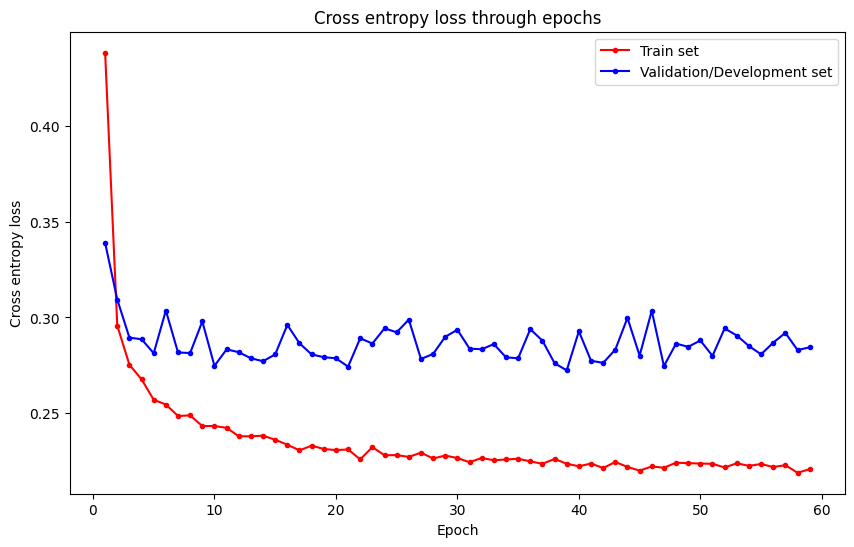

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses)+1), train_losses, marker='.', color='red', label='Train set')

if (val_losses != None):
  plt.plot(range(1, len(val_losses)+1), val_losses, marker='.', color='blue', label='Validation/Development set')

plt.title('Cross entropy loss through epochs')
plt.ylabel('Cross entropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### **Comparison with Sklearn's Logistic Regression**

First we are going to train our model with the training set and get the same metrics as before.

In [ ]:
sklearn_logreg = LogisticRegression(max_iter=100, random_state=42)
sklearn_logreg.fit(X_train, y_train)

# Using LogisticRegression Classifier
p_train_sklearn = sklearn_logreg.predict(X_train)
print(classification_report(y_train, p_train_sklearn))

              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95      1159
         2.0       0.67      0.65      0.66       194
         3.0       0.85      0.80      0.82       135

    accuracy                           0.90      1488
   macro avg       0.82      0.80      0.81      1488
weighted avg       0.90      0.90      0.90      1488



Now that the model is trained, we are going to make predictions on testing set.

In [ ]:
p_test_sklearn = sklearn_logreg.predict(X_test)
print(classification_report(y_test, p_test_sklearn))

              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       496
         2.0       0.72      0.60      0.66       101
         3.0       0.66      0.80      0.73        41

    accuracy                           0.88       638
   macro avg       0.77      0.79      0.77       638
weighted avg       0.88      0.88      0.88       638



## **KNN Classifier**

In [ ]:
class KNNClassifier:
  def __init__(self, K):
    self.K = K
    self.X_train = None
    self.y_train = None

  def _sqrdist(self, x, y):
    y = np.tile(y,(x.shape[0],1))
    d = np.sqrt((np.square(x-y).sum(axis=1)))
    return d


  def fit(self, X, y):
    self.X_train = X
    self.y_train = y


  def predict(self, X_test):
    Ntest = X_test.shape[0]
    ytest = []

    for n in range(Ntest):
      d = self._sqrdist(self.X_train, X_test[n,:])

      # return the indices of the K closest instances
      closest = np.argsort(d)[:self.K]
      # get the predicted values of the closest instances
      closest_labels = self.y_train[closest] # shape = kx2

      label_counts = Counter(closest_labels).most_common(1)[0][0]

      ytest.append(label_counts)

    return np.array(ytest)



In [ ]:
def cross_validation(K, numFolds, X, y):

    N = X.shape[0]
    #random permute the data before we split them
    np.random.seed(10)
    perm = np.random.permutation(N)
    X = X[perm]
    y = y[perm]


    # The fold variable will have size numFolds + 1
    chunk_size = int(N/numFolds)
    split_ind = np.arange(chunk_size,chunk_size*numFolds, chunk_size)

    # if chunk_size*numFolds < N:
    #     split_ind[-1] = N-1
    # else:
    #     last_chunk = chunk_size

    Xfolds = np.vsplit(X, split_ind) # list of arrays
    yfolds = np.array_split(y, split_ind)
    valerr = np.zeros((K, numFolds))

    for k in range(1, K+1):
      for j in range(numFolds):
        X_train = np.vstack([Xfolds[i] for i in range(len(Xfolds)) if i != j])
        y_train = np.hstack([yfolds[i] for i in range(len(yfolds)) if i != j])
        X_test = Xfolds[j]

        # prediction using kNN
        knn = KNNClassifier(k)
        knn.fit(X_train, y_train)
        ytest = knn.predict(X_test)
        # Compute the percent misclassified data points
        valerr[k-1, j] = np.count_nonzero(ytest!=yfolds[j])/X_test.shape[0]
        print("kNN for k = {}, fold # {}, error = {} ".format(k, j, valerr[k-1, j]))
      # print("Fold 9 shape:", Xfolds[9].shape)
      # print("Fold 9 labels:", np.unique(yfolds[9], return_counts=True))

    # average the validation errors
    val = valerr.sum(axis=1)/numFolds
    # select best k
    kbest = np.argmin(val)+1
    # Plot the evolution of the validation error with respect to k
    plt.plot(range(1, K+1), val*100)
    plt.ylabel('Average Validation Error %')
    plt.xlabel('K Nearest Neighbors')
    plt.show()
    print("Best k is {} with average error = {} ".format(kbest, val[kbest]))
    return kbest

### **Lets now train and test our model**

First of all we must find the best value for the hyperparameter $K \in [1, 10]$.
We are doing this using the cross_validation function, which performs **k-fold cross-validation** in order to find the best k that minimazes the validation error.

kNN for k = 1, fold # 0, error = 0.08108108108108109 
kNN for k = 1, fold # 1, error = 0.08783783783783784 
kNN for k = 1, fold # 2, error = 0.12162162162162163 
kNN for k = 1, fold # 3, error = 0.13513513513513514 
kNN for k = 1, fold # 4, error = 0.11486486486486487 
kNN for k = 1, fold # 5, error = 0.07432432432432433 
kNN for k = 1, fold # 6, error = 0.0945945945945946 
kNN for k = 1, fold # 7, error = 0.13513513513513514 
kNN for k = 1, fold # 8, error = 0.0945945945945946 
kNN for k = 1, fold # 9, error = 0.1282051282051282 
kNN for k = 2, fold # 0, error = 0.08108108108108109 
kNN for k = 2, fold # 1, error = 0.08783783783783784 
kNN for k = 2, fold # 2, error = 0.12162162162162163 
kNN for k = 2, fold # 3, error = 0.13513513513513514 
kNN for k = 2, fold # 4, error = 0.11486486486486487 
kNN for k = 2, fold # 5, error = 0.07432432432432433 
kNN for k = 2, fold # 6, error = 0.0945945945945946 
kNN for k = 2, fold # 7, error = 0.13513513513513514 
kNN for k = 2, fold # 8, error =

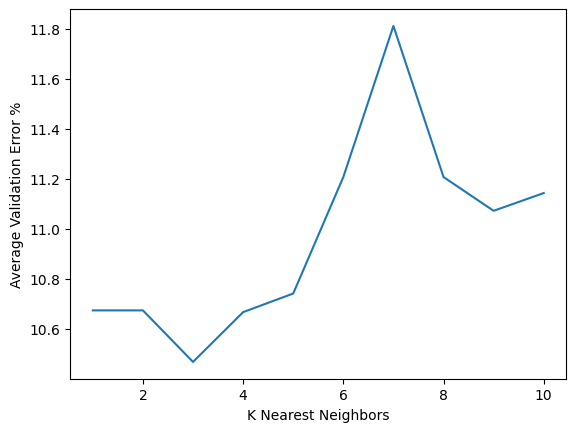

Best k is 3 with average error = 0.10667013167013169 


In [ ]:
kbest = cross_validation(10, 10, X_train, y_train)

Now that we found the optimal value for **K** we are going to train our model on the training set and calculate the accuracy.

In [ ]:
knn = KNNClassifier(3)
knn.fit(X_train,y_train)

p_train = knn.predict(X_train)
print(classification_report(y_train,p_train))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97      1159
         2.0       0.87      0.77      0.81       194
         3.0       0.92      0.90      0.91       135

    accuracy                           0.95      1488
   macro avg       0.92      0.89      0.90      1488
weighted avg       0.95      0.95      0.95      1488



Now that our model is train we are going to make predictions on the test dataset and get the classification report.

In [ ]:
p_test = knn.predict(X_test)
print(classification_report(y_test,p_test))

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       496
         2.0       0.77      0.64      0.70       101
         3.0       0.79      0.80      0.80        41

    accuracy                           0.90       638
   macro avg       0.83      0.80      0.81       638
weighted avg       0.90      0.90      0.90       638



#### **Comparison with Sklearn's KNeighborsClassifier**


We are going to use the same hyperparameter value, which is **K=3**.

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
p_train = neigh.predict(X_train)
print(classification_report(y_train,p_train))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97      1159
         2.0       0.87      0.76      0.81       194
         3.0       0.92      0.90      0.91       135

    accuracy                           0.95      1488
   macro avg       0.92      0.88      0.90      1488
weighted avg       0.95      0.95      0.95      1488




Now that the model is trained, we are going to make predictions on testing set and get the accuracy.

In [ ]:
p_test = neigh.predict(X_test)
print(classification_report(y_test,p_test))

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       496
         2.0       0.77      0.64      0.70       101
         3.0       0.80      0.80      0.80        41

    accuracy                           0.90       638
   macro avg       0.84      0.80      0.82       638
weighted avg       0.90      0.90      0.90       638



##**Naïve Bayes Classifier**

### **Gaussian Naïve Bayes Classifier**

This approach models each feature as following a normal distribution independently for each class. Importantly, we allow different means and variances per feature per class, but we assume a diagonal covariance matrix (i.e., features are independent within a class).

In [ ]:
class GaussianNaiveBayes:

  def __init__(self):
    self.classes = None
    self.priors = {}
    self.means = {}
    self.variances = {}


  def _gaussian_log_likelihood(self, x, mean, var):
    var = np.maximum(var, 1e-9)

    a = -0.5 * np.log(2.0 * np.pi * var)
    b = -0.5 * (((x - mean)**2) / var)

    return np.sum(a+b)


  def fit(self, X, y):
    self.classes = np.unique(y)
    num_samples, num_features = X.shape

    for c in self.classes:
      class_data = X[y == c]
      prior_c = len(class_data) / num_samples
      self.priors[c] = prior_c

      mean_c = np.mean(class_data, axis=0)    # shape: (n_features,)
      self.means[c] = mean_c
      var_c  = np.var(class_data, axis=0)     # shape: (n_features,)
      self.variances[c] = var_c


  def predict(self, X):
    predictions = []

    for sample in X:
      posteriors = []
      for c in self.classes:
        log_prior_c = np.log(self.priors[c])
        log_likelihood = self._gaussian_log_likelihood(sample, self.means[c], self.variances[c])
        log_posterior_c = log_prior_c + log_likelihood
        posteriors.append(log_posterior_c)

      predictions.append(self.classes[np.argmax(posteriors)])

    return np.array(predictions)

### **Lets now train and test our model**


First we are going to train our model and make predictions on the training set and get the classification report.

In [ ]:
naiveBayes = GaussianNaiveBayes()
naiveBayes.fit(X_train, y_train)

p_train = naiveBayes.predict(X_train)

print(classification_report(y_train, p_train))

              precision    recall  f1-score   support

         1.0       1.00      0.70      0.82      1159
         2.0       0.34      0.95      0.50       194
         3.0       0.65      0.62      0.64       135

    accuracy                           0.73      1488
   macro avg       0.66      0.76      0.65      1488
weighted avg       0.88      0.73      0.76      1488



Now that our model is trained, we are going to make predictions on our testing set and get the classification report.

In [ ]:
p_test = naiveBayes.predict(X_test)
print(classification_report(y_test, p_test, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.83      0.94      0.88       496
         2.0       0.00      0.00      0.00       101
         3.0       0.48      0.93      0.63        41

    accuracy                           0.79       638
   macro avg       0.44      0.62      0.51       638
weighted avg       0.68      0.79      0.73       638



#### **Comparison with Sklearn's Gaussian Naive Bayes**.

In [ ]:
sklearn_naiveBayes = GaussianNB()
sklearn_naiveBayes.fit(X_train, y_train)

p_train_sklearn = sklearn_naiveBayes.predict(X_train)
print(classification_report(y_train, p_train_sklearn))

              precision    recall  f1-score   support

         1.0       1.00      0.70      0.82      1159
         2.0       0.34      0.95      0.50       194
         3.0       0.65      0.62      0.64       135

    accuracy                           0.73      1488
   macro avg       0.66      0.76      0.65      1488
weighted avg       0.88      0.73      0.76      1488



Now that the model is fitted, we are making predictions on the testing set and get the classification report.

In [ ]:
p_test_sklearn = sklearn_naiveBayes.predict(X_test)
print(classification_report(y_test, p_test_sklearn, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.83      0.94      0.88       496
         2.0       0.00      0.00      0.00       101
         3.0       0.48      0.93      0.63        41

    accuracy                           0.79       638
   macro avg       0.44      0.62      0.51       638
weighted avg       0.68      0.79      0.73       638



##**Multilayer Perceptron (MLP)**

### **GPU support**
A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. A GPU can perform many thousands of small operations in parallel, making it very well suitable for performing large matrix operations in neural networks. When comparing GPUs to CPUs, we can list the following main differences (credit: [Kevin Krewell, 2009](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/))

GPUs can accelerate the training of our network up to a factor of $100$ which is essential for large neural networks. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn)). First, let's check whether we have a GPU available:

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Is the GPU available? False
Device cpu


### **Defining our model**
We will create a Multilayer Perceptron (a neural network with multiple linear layers in combined with non-linear activation functions) via Pytorch framework.\
The MLP will have one input layer, two hidden layers and one output layer. We will make use of the ReLu activation function.

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_dim, hidden1_dim, hidden2_dim, output_dim):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden1_dim)
        self.linear2 = nn.Linear(hidden1_dim, hidden2_dim)
        self.linear3 = nn.Linear(hidden2_dim, output_dim)

        self.relu = nn.ReLU()

  def forward(self, x):
    x = self.linear1(x)
    x = self.relu(x)

    x = self.linear2(x)
    x = self.relu(x)

    x = self.linear3(x)

    return x

#### **Training**

In [ ]:
def trainMLP(model, optimizer, data_loader, loss_module, num_epochs=100, device = 'cpu'):
  model.train();
  cross_entropy_losses = []
  accuracies = []
  for epoch in tqdm(range(num_epochs)):
      train_loss = 0
      for data_inputs, data_labels in data_loader:
          data_inputs = data_inputs.to(device)
          data_labels = data_labels.to(device)

          # Forward pass
          ## Step 2: Run the model on the input data
          preds = model(data_inputs)
          preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

          loss = loss_module(preds, data_labels)

          ## Step 4: Perform backpropagation
          # Before calculating the gradients, we need to ensure that they are all zero.
          # The gradients would not be overwritten, but actually added to the existing ones.
          optimizer.zero_grad()
          # Perform backpropagation
          loss.backward()
          ## Step 5: Update the parameters
          optimizer.step()

          train_loss += loss.item()

      epoch_train_loss = train_loss / len(data_loader)
      cross_entropy_losses.append(epoch_train_loss)
  return cross_entropy_losses



#### **Evaluation**

In [ ]:
def evalMLP(model, data_loader):
  model.eval() # Set model to eval mode
  true_preds, num_preds = 0., 0.

  predictions = []

  with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)

            _, predicted = torch.max(preds, dim=1)
            predictions.append(torch.argmax(preds, dim=1).item())
            true_preds += (predicted == data_labels).sum().item()
            num_preds += data_labels.shape[0]

        acc = true_preds / num_preds
        print(f"Accuracy of the model: {100.0*acc:4.2f}%")

  return acc,  predictions




#### **Let's now train and test our model**.

Firstly we are going to process our data, by turning NumPy arrays to PyTorch tensors.

In [ ]:
temp_y_train = y_train - 1
temp_y_test = y_test - 1

# Train Set
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(temp_y_train, dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Test Set
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(temp_y_test, dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


Next we must define the some parameters.\
As we were instructed we must use these parameters :


*   For **Optimizer** we are using **Stochastic Gradient Descent (SGD)**
*   For **Loss Function** we are using **Cross Entropy Loss**

For the layers of the MLP we are using :


*   **input_dim** will be the **number of features**
*   **hidden1_dim** will be **64**
*   **hidden1_dim** will be **32**
*   **output_dim** will be the **number of classes**

For the data loader the batch size will be 32 for the training set and 1 for the testing set.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)
loss_module = nn.CrossEntropyLoss()

model = MLP(input_dim=X_train.shape[1], hidden1_dim=64, hidden2_dim=32, output_dim=len(np.unique(y_train)))
loss_module = nn.CrossEntropyLoss()

## We set the learning rate to be 0.01 likewe did in the logistic regression
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Display the model
print(model)


MLP(
  (linear1): Linear(in_features=21, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
)


Lets now train the model.

In [ ]:
train_cross_entropy_losses = trainMLP(model, optimizer, train_loader, loss_module )

100%|██████████| 100/100 [00:07<00:00, 14.03it/s]


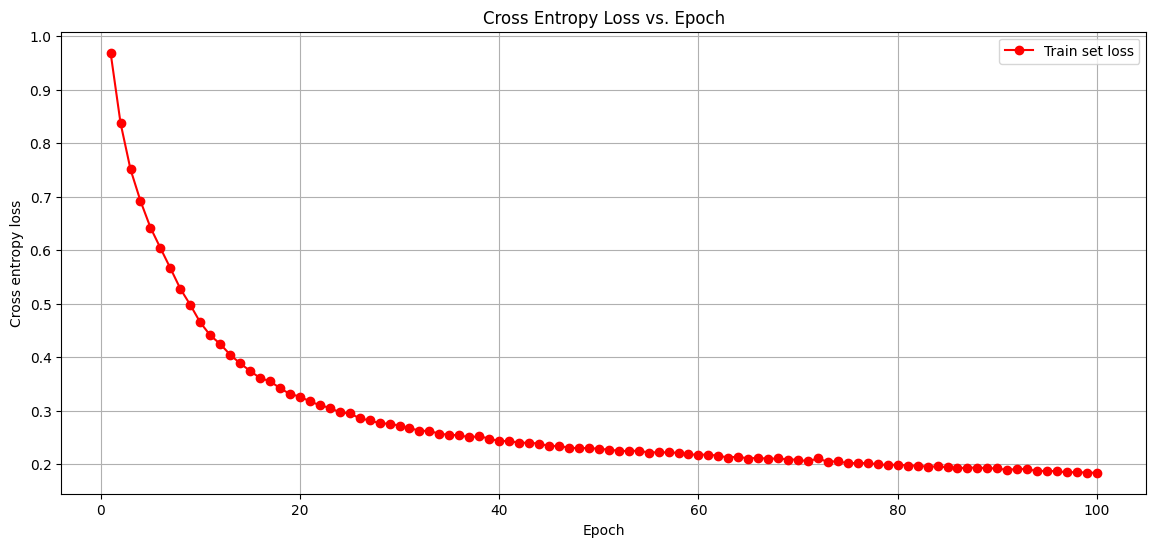

In [ ]:
plt.figure(figsize=(14,6))
epochs = range(1, len(train_cross_entropy_losses)+1)

plt.plot(epochs, train_cross_entropy_losses, '-o', color='red', label='Train set loss')

plt.title('Cross Entropy Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cross entropy loss')
plt.legend()
plt.grid(True)
plt.show()

Next we are going to evaluate the model on the training set and get the accuracy and print the classification report.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
_, p_train = evalMLP(model,train_loader)
print(classification_report(temp_y_train, p_train, target_names = ['1.0', '2.0', '3.0']))

Accuracy of the model: 91.67%
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96      1159
         2.0       0.72      0.65      0.68       194
         3.0       0.90      0.83      0.86       135

    accuracy                           0.92      1488
   macro avg       0.86      0.82      0.84      1488
weighted avg       0.91      0.92      0.91      1488



Now that our model is fitted, we are going to print the classification report for the testing set.

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
_, p_test = evalMLP(model,test_loader)
print(classification_report(temp_y_test, p_test, target_names = ['1.0', '2.0', '3.0']))

Accuracy of the model: 91.54%
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       496
         2.0       0.78      0.70      0.74       101
         3.0       0.80      0.85      0.82        41

    accuracy                           0.92       638
   macro avg       0.84      0.84      0.84       638
weighted avg       0.91      0.92      0.91       638



#### **Comparison with Sklearn's MLP.**

First we are going to train our model and print the classification report on the training dataset.

In [ ]:
sklearn_mlp = MLPClassifier(hidden_layer_sizes=[64,32], activation='relu', solver='sgd', batch_size=32, alpha=0, max_iter=100, shuffle=True, learning_rate_init=0.01)
sklearn_mlp.fit(X_train,y_train)

p_train_sklearn = sklearn_mlp.predict(X_train)
print(classification_report(y_train, p_train_sklearn))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1159
         2.0       0.96      0.99      0.98       194
         3.0       1.00      0.96      0.98       135

    accuracy                           0.99      1488
   macro avg       0.99      0.98      0.99      1488
weighted avg       0.99      0.99      0.99      1488



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Now that the model is fitted, we are going to make predictions on the testing set and print classification report.

In [ ]:
p_test_sklearn = sklearn_mlp.predict(X_test)
print(classification_report(y_test, p_test_sklearn))

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       496
         2.0       0.80      0.80      0.80       101
         3.0       0.83      0.83      0.83        41

    accuracy                           0.92       638
   macro avg       0.86      0.86      0.86       638
weighted avg       0.92      0.92      0.92       638



## **SVM (Support Vector Machines).**



*   We address the problem using multiple One-vs-Rest SVMs:\
&nbsp;&nbsp;&nbsp;&nbsp; We treat the positive class as positive.\
&nbsp;&nbsp;&nbsp;&nbsp; We treat the remaining classes as negative.

*   We train an SVM for each class (with appropriate modifications to your data).

*   Determine the final label by selecting the label of the SVM with the highest score.


**Cost funtion :**

$$
l = \max(0, 1 - y_i(w \cdot x_i - b))
$$

$$
l =
\begin{cases}
0 & \text{if } y \cdot f(x) \geq 1 \\
1 - y \cdot f(x) & \text{otherwise}
\end{cases}
$$

$$$$
$$$$


$$J = \lambda \|w\|^2 + \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i (w \cdot x_i - b)) $$

$$\text{if } y_i \cdot f(x) \geq 1:$$

$$J_i = \lambda \|w\|^2$$


$$\text{else:}$$

$$J_i = \lambda \|w\|^2 + 1 - y_i (w \cdot x_i - b)
$$


In [ ]:
class SVM:
  def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
      self.lr = learning_rate
      self.lambda_param = lambda_param
      self.n_iters = n_iters
      self.weights = {}
      self.bias = {}
      self.num_classes = None

  def _fit_binary(self, X, y):
      n_samples, n_features = X.shape
      w = np.zeros(n_features)
      b = 0.0

      for _ in range(self.n_iters):
        for idx, x_i in enumerate(X):
          margin = y[idx] * (np.dot(x_i, w) - b)

          if (margin >= 1):
            w -= self.lr * (2 * self.lambda_param * w)
          else:
            w -= self.lr * (2 * self.lambda_param * w - np.dot(x_i, y[idx]))
            b -= self.lr * y[idx]

      return w, b


  def fit(self, X, y):
      self.num_classes = np.unique(y)

      for c in self.num_classes:
        y_binary = np.where(y == c, +1, -1)
        w_c, b_c = self._fit_binary(X, y_binary)
        self.weights[c] = w_c
        self.bias[c] = b_c


  def predict(self, X):
      scores = []
      for c in self.num_classes:
        score_c = np.dot(X, self.weights[c]) - self.bias[c]
        scores.append(score_c)


      scores = np.vstack(scores).T  # the shape was (num_classes, n_samples) but by adding transpose we make it (n_samples, num_classes)
      max_indices = np.argmax(scores, axis=1)
      return self.num_classes[max_indices] # our classes start from 1 not 0



### **Lets now train and test our model**


First we are going to train our model and make predictions on the training set and get the classification report.

In [ ]:
svm_classifier = SVM()
svm_classifier.fit(X_train, y_train)

p_train = svm_classifier.predict(X_train)

print(classification_report(y_train, p_train))

              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95      1159
         2.0       0.68      0.53      0.59       194
         3.0       0.87      0.71      0.78       135

    accuracy                           0.89      1488
   macro avg       0.82      0.74      0.77      1488
weighted avg       0.89      0.89      0.89      1488



Now that our model is trained, we are going to make predictions on our testing set and get the classification report.

In [ ]:
p_test = svm_classifier.predict(X_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

         1.0       0.91      0.98      0.94       496
         2.0       0.84      0.46      0.59       101
         3.0       0.72      0.80      0.76        41

    accuracy                           0.89       638
   macro avg       0.82      0.75      0.76       638
weighted avg       0.88      0.89      0.88       638



#### **Comparison with Sklearn's SVC**.

In [ ]:
sklearn_svm = SVC(kernel='linear')
sklearn_svm.fit(X_train, y_train)

p_train_sklearn = sklearn_svm.predict(X_train)

print(classification_report(y_train, p_train_sklearn))

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96      1159
         2.0       0.72      0.72      0.72       194
         3.0       0.89      0.85      0.87       135

    accuracy                           0.92      1488
   macro avg       0.86      0.85      0.85      1488
weighted avg       0.92      0.92      0.92      1488



Now that our model is trained, we are going to make predictions on our testing set and get the classification report.

In [ ]:
p_test_sklearn = sklearn_svm.predict(X_test)
print(classification_report(y_test, p_test_sklearn))

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       496
         2.0       0.73      0.68      0.70       101
         3.0       0.71      0.83      0.76        41

    accuracy                           0.90       638
   macro avg       0.80      0.82      0.81       638
weighted avg       0.90      0.90      0.90       638



## **$k$-Means Algorithm**

### $k$-Means Algorithm

### Given:
- **Data:** $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_N], \, \mathbf{x}_i \in \mathbb{R}^d$
- **Clusters:** Assume $K$ clusters, where $K \ll N$.
- **Centroids:** Each cluster $k$ has a mean vector $\boldsymbol{\mu}_k \in \mathbb{R}^d$, initialized randomly.
- **Goal:** Estimate the $K$ mean vectors.

### Process:
1. **Assign** each data point $i$ to the cluster with the nearest mean.
2. **Update** the means based on the assignments.
3. **Repeat** until convergence.

### Cost Function:
The cost function to minimize is:
$$
J = \frac{1}{2} \sum_{i=1}^N \sum_{k=1}^K \mathbf{1}_{\hat{y}_i = k} \|\mathbf{x}_i - \boldsymbol{\mu}_k\|^2 = \frac{1}{2} \sum_{i=1}^N \|\mathbf{x}_i - \boldsymbol{\mu}_{\hat{y}_i}\|^2
$$

The algorithm is iterative and stops when convergence is achieved.

---

#### Steps:

##### E-Step (Expectation):
Estimate the most probable cluster for each data point:
$$
\hat{y}_i = \arg \min_k \|\mathbf{x}_i - \boldsymbol{\mu}_k\|^2, \quad i = 1, 2, \dots, N
$$

##### M-Step (Maximization):
Update the mean vectors for each cluster:
$$
\boldsymbol{\mu}_k = \frac{\sum_{i=1}^N \mathbf{1}_{\hat{y}_i = k} \mathbf{x}_i}{\sum_{i=1}^N \mathbf{1}_{\hat{y}_i = k}}, \quad k = 1, 2, \dots, K
$$







In [ ]:
class kMeans:
    def __init__(self, K = 3, max_iters = 100):
      self.K = K
      self.max_iters = max_iters
      self.centroids = []


    def costJ(self, X, centroids, labels):
      labels = labels.astype(int)
      return 0.5 * sum(np.square(X[i] - centroids[labels[i]]).sum() for i in range(X.shape[0]))


    def fit(self, X):
      indices = np.random.choice(X.shape[0], self.K, replace=False)
      self.centroids = X[indices]
      costs_e = list()
      costs_m = list()
      for i in tqdm(range(self.max_iters)):
        # Expectation
        labels = self.predict(X)
        costs_e.append(self.costJ(X, self.centroids, labels))

        # Maximization
        new_centroids = []
        for label in range(self.K):
          cluster_points = X[labels == label]
          if len(cluster_points) > 0:
              centroid = np.mean(cluster_points, axis=0)
          else:
              centroid = self.centroids[label]
          new_centroids.append(centroid)

        new_centroids = np.array(new_centroids)
        costs_m.append(self.costJ(X, new_centroids, labels))

        if ((new_centroids == self.centroids).all()):
          print(f"Algorithm converged at iteration {i}")
          break

        self.centroids = new_centroids

      return self.centroids, costs_e, costs_m

    def predict(self, X):
      labels = np.zeros(X.shape[0])

      for i, x in enumerate(X):
        distances = np.sum((self.centroids - x) ** 2, axis=1)
        labels[i] = np.argmin(distances)

      return labels



###**Lets now train and test our model**

First we are going to train our model and plot the evolution of the cost J.

In [ ]:
def plot_cost_evolution(costs_e, costs_m):

    iters = range(len(costs_e))
    plt.figure(figsize=(12,8))

    # Plot cost after E-step
    plt.plot(iters, costs_e, 'o-', color='blue', label='E-step cost')

    # Plot cost after M-step
    plt.plot(iters, costs_m, 'o-', color='red', label='M-step cost')

    plt.title('K-Means Cost J Evolution (E-step vs. M-step)')
    plt.xlabel('Iteration')
    plt.ylabel('Cost J')
    plt.legend()
    plt.grid(True)
    plt.show()


 21%|██        | 21/100 [00:00<00:02, 29.58it/s]


Algorithm converged at iteration 21


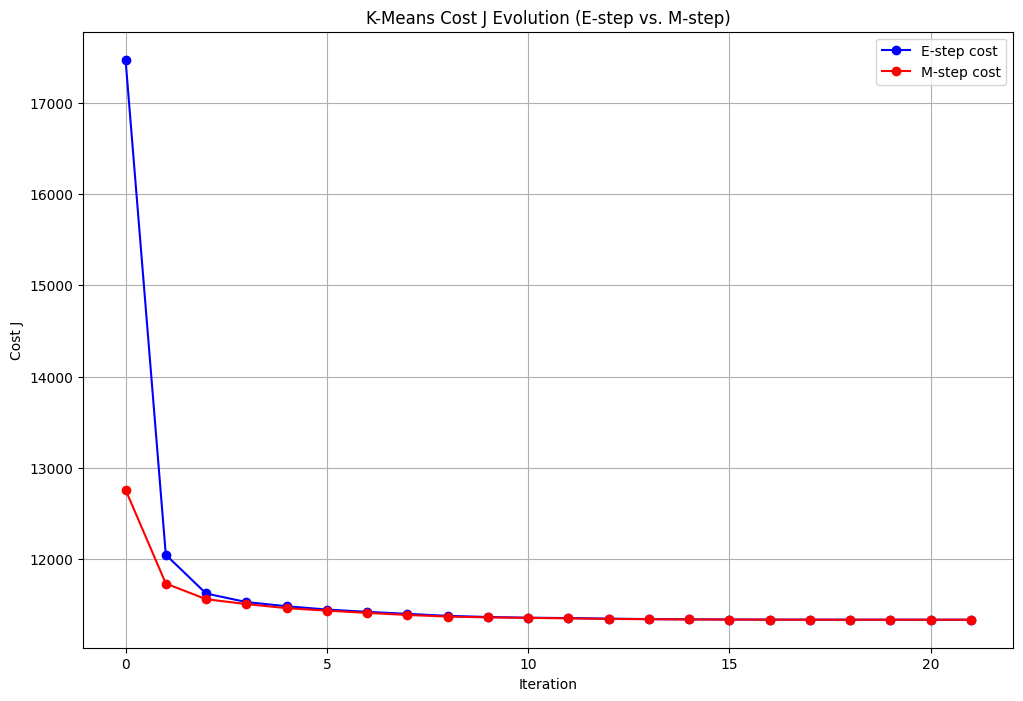

In [ ]:
classes = len(np.unique(y_train))
max_iters = 100

kmeans = kMeans(classes, max_iters)
centroids, costs_expectation, costs_maximization = kmeans.fit(X_train)

plot_cost_evolution(costs_expectation, costs_maximization)

Now that our model is fitted, we are going to make predictions on testing set and get the silhouette_score which measures how similar an object is to its own cluster compared to other clusters.

In [ ]:
from sklearn.metrics import silhouette_score

labels = kmeans.predict(X_test)

# Calculate Silhouette Score
score = silhouette_score(X_test, labels)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.1471404100328013


#### **Comparison with Sklearn's K-Means**

In [ ]:
k_means_sklearn = KMeans(n_clusters=classes, init="random")
k_means_sklearn.fit(X_train)


labels_sklearn = k_means_sklearn.predict(X_test)
# Calculate Silhouette Score
score_sklearn = silhouette_score(X_test, labels_sklearn)
print(f"Silhouette Score: {score_sklearn}")

Silhouette Score: 0.16888158050194246
